# Pseudorandom Number Generators


# Custom


In [1]:
from pseudo_random_numbers.generators import (
    LinearCongruentialGenerator,
    MersenneTwister,
    MiddleSquareGenerator,
    MultiplyWithCarry,
    Xorshift,
    BlumBlumShub,
    SplitMix,
)
from pseudo_random_numbers.helper import hist

__all__ = [
    "LinearCongruentialGenerator",
    "MersenneTwister",
    "MiddleSquareGenerator",
    "MultiplyWithCarry",
    "Xorshift",
    "BlumBlumShub",
    "SplitMix",
]


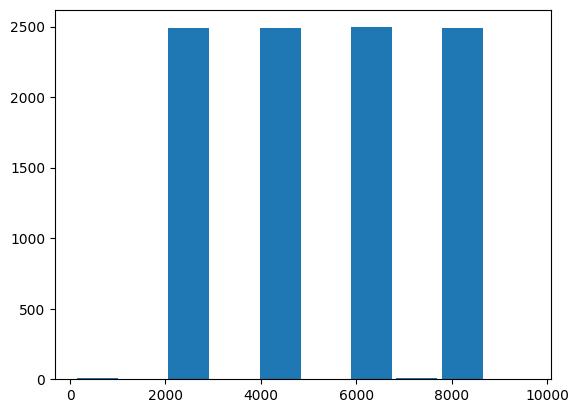

In [2]:
hist(MiddleSquareGenerator())


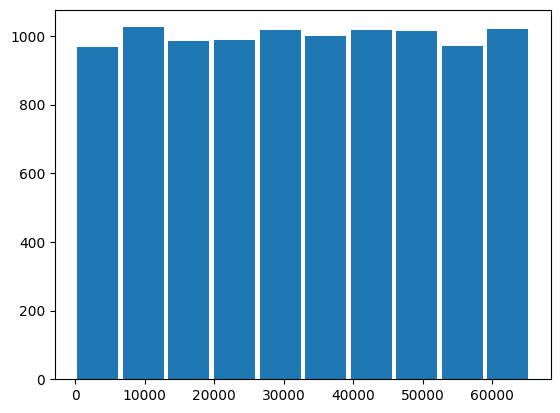

In [3]:
hist(LinearCongruentialGenerator(34567))


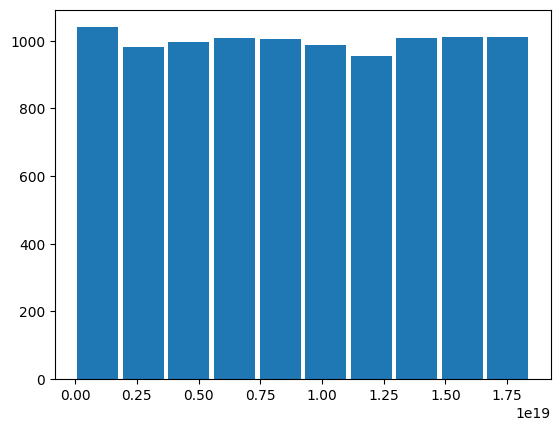

In [4]:
hist(BlumBlumShub(5909))


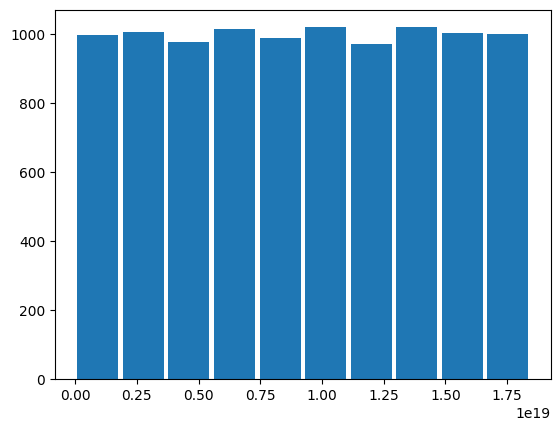

In [5]:
hist(MultiplyWithCarry(seed=16148168401, multiplier=797161, carry=1, modulo=2**64))


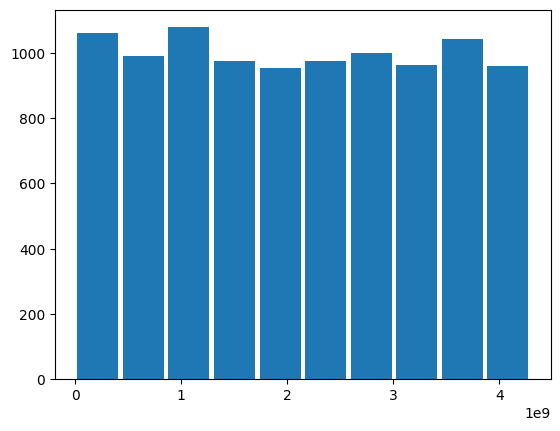

In [6]:
hist(MersenneTwister(734567))


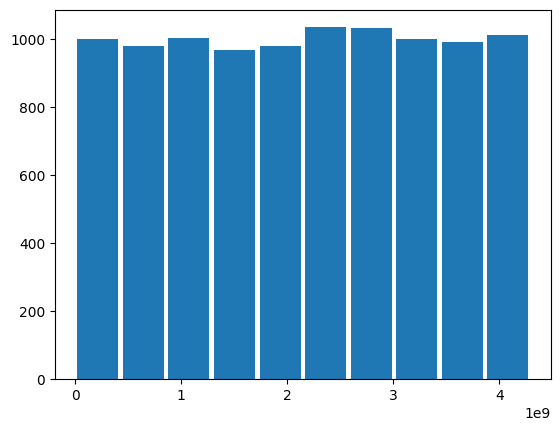

In [7]:
hist(Xorshift())


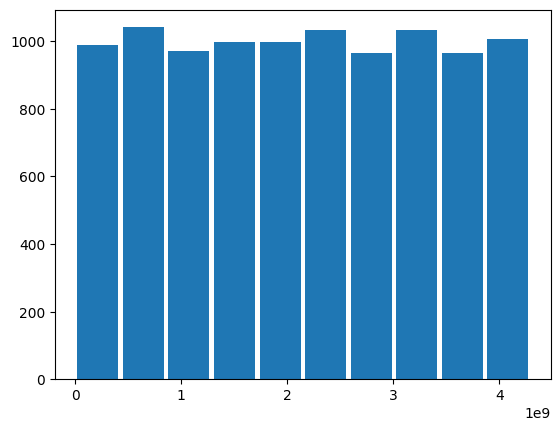

In [8]:
hist(SplitMix(25645))


## How to make float ranges?


In [9]:
# space for your code
# space for your code
# space for your code
# space for your code
# space for your code
# space for your code
# space for your code
# space for your code
# space for your code
# space for your code
# space for your code
# space for your code
# space for your code
# space for your code
# space for your code


## Builtin


In [10]:
import random


In [11]:
# 1. random(): Return the next random floating point number in the range [0.0, 1.0).
print(random.random())


0.824027994634098


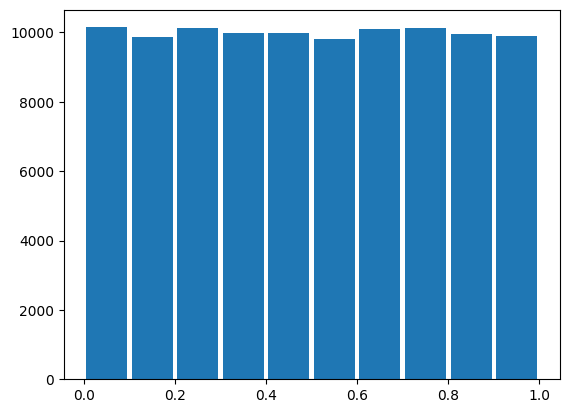

In [12]:
hist([random.random() for _ in range(100_000)])


In [13]:
# 2. uniform(a, b): Return a random floating point number between a and b (inclusive).
print(random.uniform(1, 10))


4.472829474248962


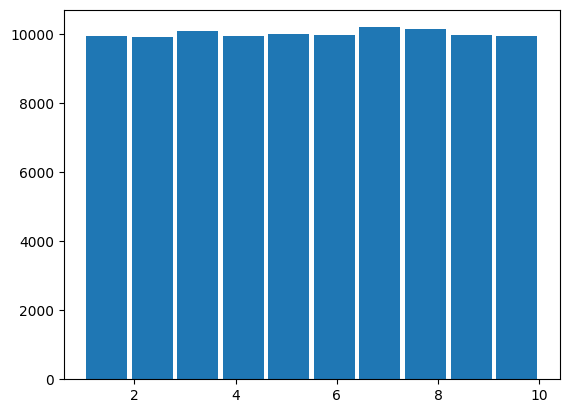

In [14]:
hist([random.uniform(1, 10) for _ in range(100_000)])


In [15]:
# 3. randint(a, b): Return a random integer between a and b (inclusive).
print(random.randint(1, 10))


7


In [16]:
# 4. randrange(start, stop[, step]): Return a randomly selected element from range(start, stop, step).
print(random.randrange(0, 101, 5))


95


In [17]:
# 5. choice(seq): Return a random element from the non-empty sequence seq.
print(random.choice(["red", "blue", "green"]))


blue


In [18]:
# 6. shuffle(seq): Shuffle the sequence seq in place.
my_list = [1, 2, 3, 4, 5]
random.shuffle(my_list)
print(my_list)


[1, 2, 3, 5, 4]


In [19]:
# 7. sample(population, k): Return a k length list of unique elements chosen from the population sequence.
print(random.sample(range(10, 30), 5))


[28, 27, 18, 10, 14]


In [20]:
# 8. gauss(mu, sigma): Gaussian distribution. mu is the mean, and sigma is the standard deviation.
print(random.gauss(0, 1))


0.2909982884862288


In [21]:
# 9. seed(a=None, version=2): Initialize the random number generator.
random.seed(1234)
print(random.random())


0.9664535356921388


# Numpy


In [22]:
import numpy as np


### Mersenne Twister (MT19937)


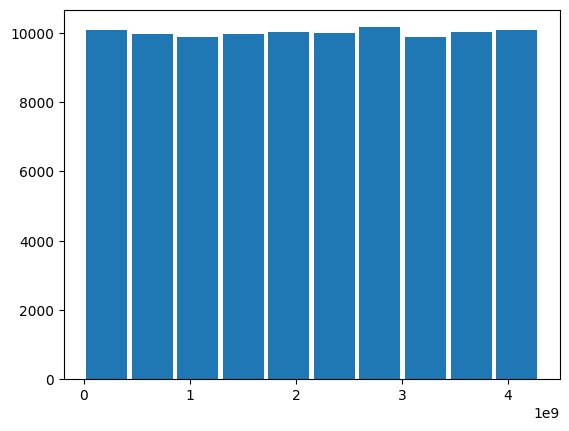

In [23]:
mt19937 = np.random.MT19937(0)
hist(mt19937.random_raw(100_000))


### Permuted Congruential Generator (64-bit, PCG64)


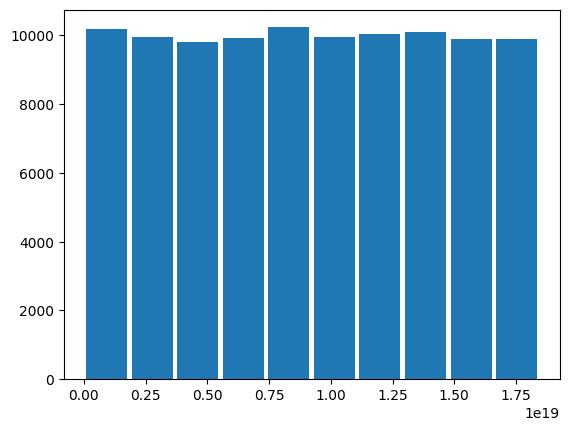

In [24]:
pcg64 = np.random.PCG64(0)
hist(pcg64.random_raw(100_000))


### Permuted Congruential Generator (64-bit, PCG64 DXSM)


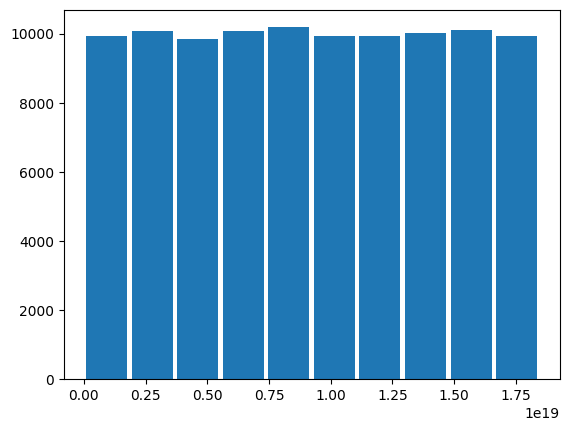

In [25]:
pcg64dxsm = np.random.PCG64DXSM(0)
hist(pcg64dxsm.random_raw(100_000))


### Philox Counter-based RNG


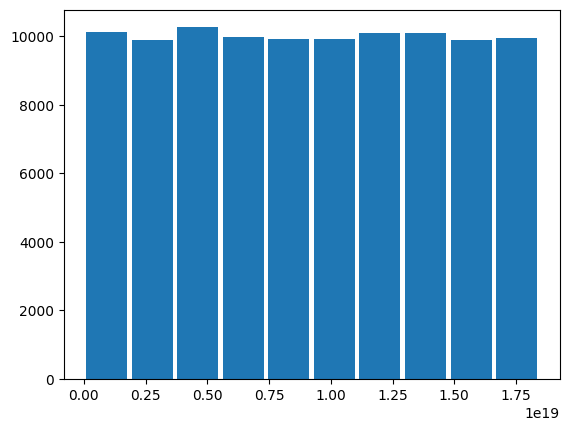

In [26]:
philox = np.random.Philox(0)
hist(philox.random_raw(100_000))


### SFC64 Small Fast Chaotic PRNG


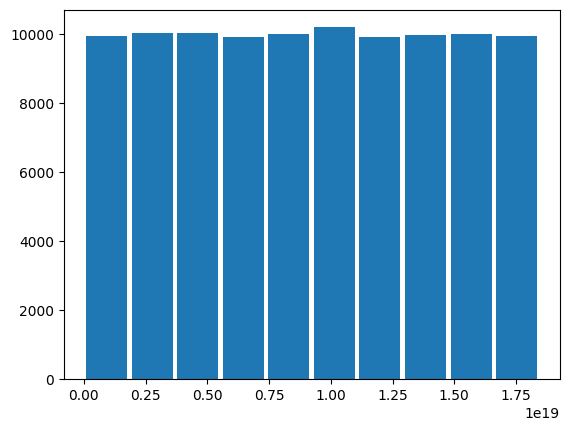

In [27]:
sfc = np.random.SFC64(0)
hist(sfc.random_raw(100_000))


## Statistical testing


In [28]:
from scipy.stats import chisquare
import random
import numpy as np

# Generate a list of 100 pseudo-random integers between 1 and 10
random_numbers = [random.randint(1, 10) for _ in range(10_000)]

num_bins = 100
observed, _ = np.histogram(random_numbers, bins=range(1, num_bins + 2))
expected = [100] * num_bins

chi2, p = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 90097.1
p-value: 0.0


In [29]:
from scipy.stats import kstest
import random
import numpy as np

# Generate a list of 100 pseudo-random floats between 0 and 1
random_numbers = [random.uniform(0, 1) for _ in range(100_000)]

sorted_numbers = np.sort(random_numbers)
cdf = np.arange(1, len(random_numbers) + 1) / len(random_numbers)

ks_statistic, p = kstest(sorted_numbers, cdf)

print("KS statistic:", ks_statistic)
print("p-value:", p)


KS statistic: 0.0023600000000000287
p-value: 0.9427850331224974
